In [1]:
import scanpy as sc
sc.set_figure_params()

In [2]:
import pandas as pd
adata=sc.AnnData(pd.read_table("GSM3408137_Inj_Sciatic_Beads.txt.gz",index_col=0).T)

In [3]:
import scipy.sparse as sp
adata.X=sp.csr_matrix(adata.X)

In [4]:
adata.X

<4300x19981 sparse matrix of type '<class 'numpy.float32'>'
	with 4894589 stored elements in Compressed Sparse Row format>

In [5]:
adata_s=sc.read("Inj9dBeads_seur.h5ad")

In [6]:
adata=adata[adata_s.obs_names]

In [7]:
import scFates as scf

In [8]:
sc.pp.filter_genes(adata,min_cells=3)

Trying to set attribute `.var` of view, copying.


In [9]:
sc.pp.normalize_total(adata,target_sum=1e3)
sc.pp.log1p(adata)

Finding overdispersed features
    computing mean and variances
    gam fitting
    found 447 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



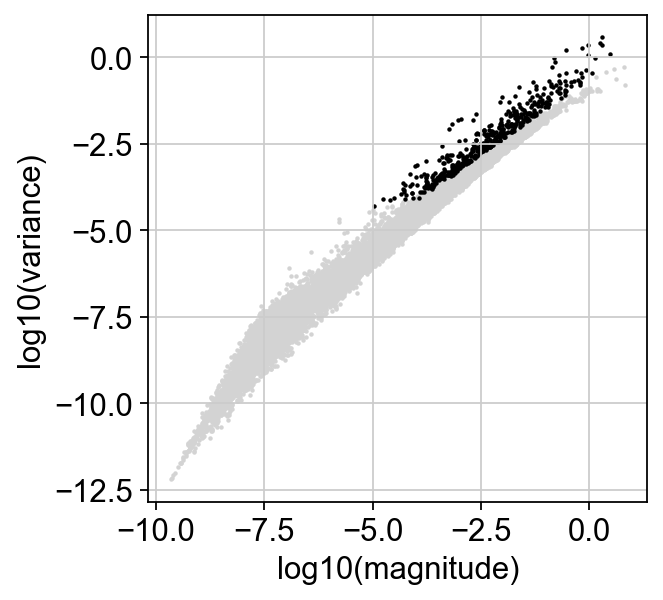

In [10]:
scf.pp.find_overdispersed(adata,plot=True)

In [11]:
adata.raw=adata

In [12]:
adata[:,adata.var.highly_variable]
sc.pp.scale(adata)
sc.pp.pca(adata)

In [13]:
sc.pp.neighbors(adata)

In [14]:
sc.tl.umap(adata)

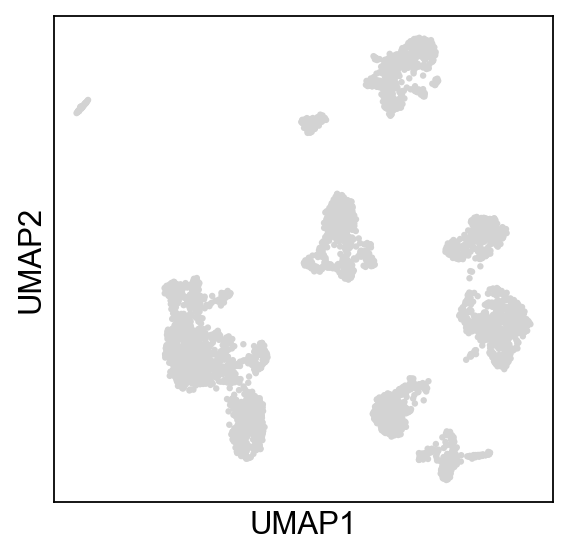

In [15]:
sc.pl.umap(adata)

In [17]:
sc.tl.leiden(adata)

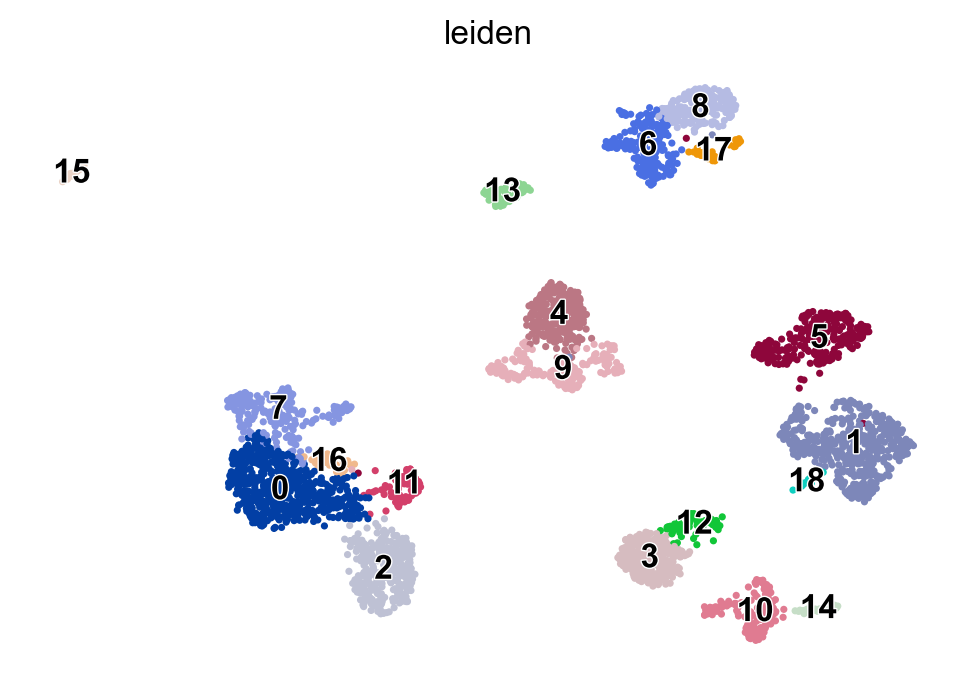

In [18]:
import scvelo as scv
scv.set_figure_params()
scv.pl.umap(adata,color="leiden")

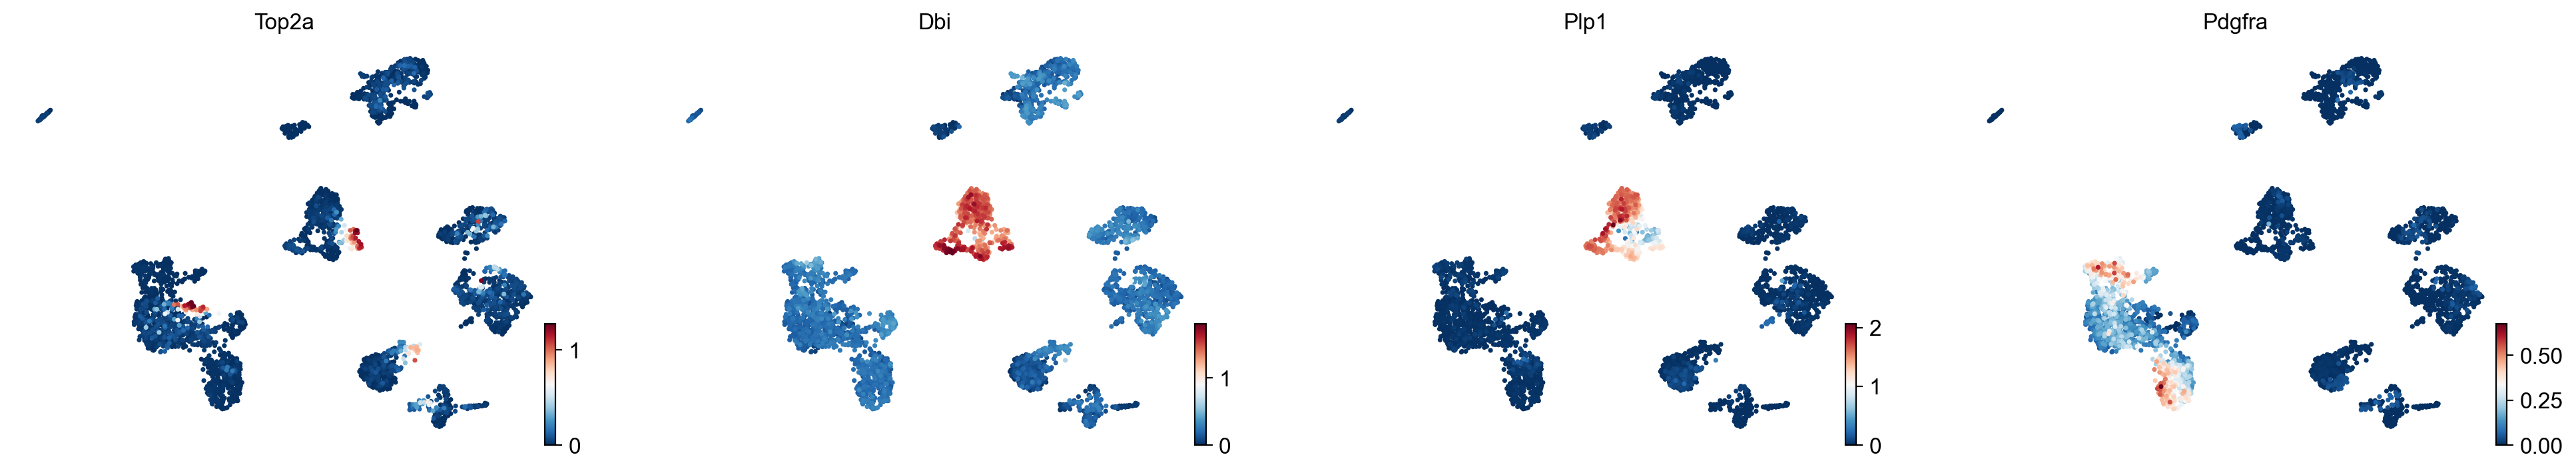

In [19]:
scv.pl.umap(adata,color=["Top2a","Dbi","Plp1","Pdgfra"],smooth=True)

In [20]:
sel=["2","0","11","7","16","4","9"]

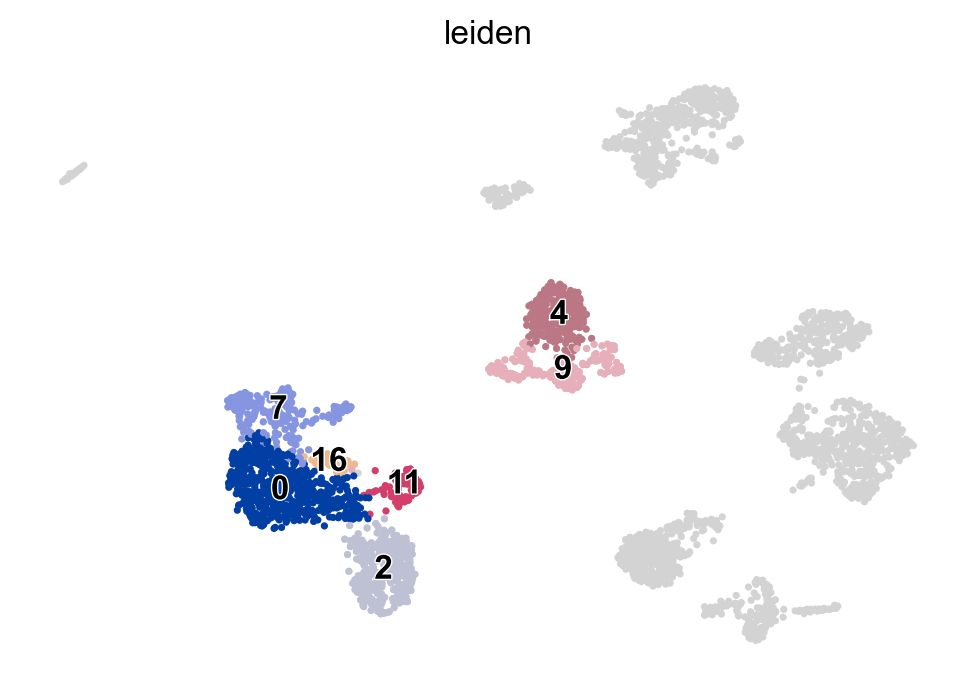

In [21]:
scv.pl.umap(adata,color="leiden",groups=sel)

In [22]:
adata=adata[adata.obs.leiden.isin(sel)]

In [23]:
adata=adata.raw.to_adata()

In [24]:
sc.pp.filter_genes(adata,min_cells=3)

Finding overdispersed features
    computing mean and variances
    gam fitting
    found 210 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



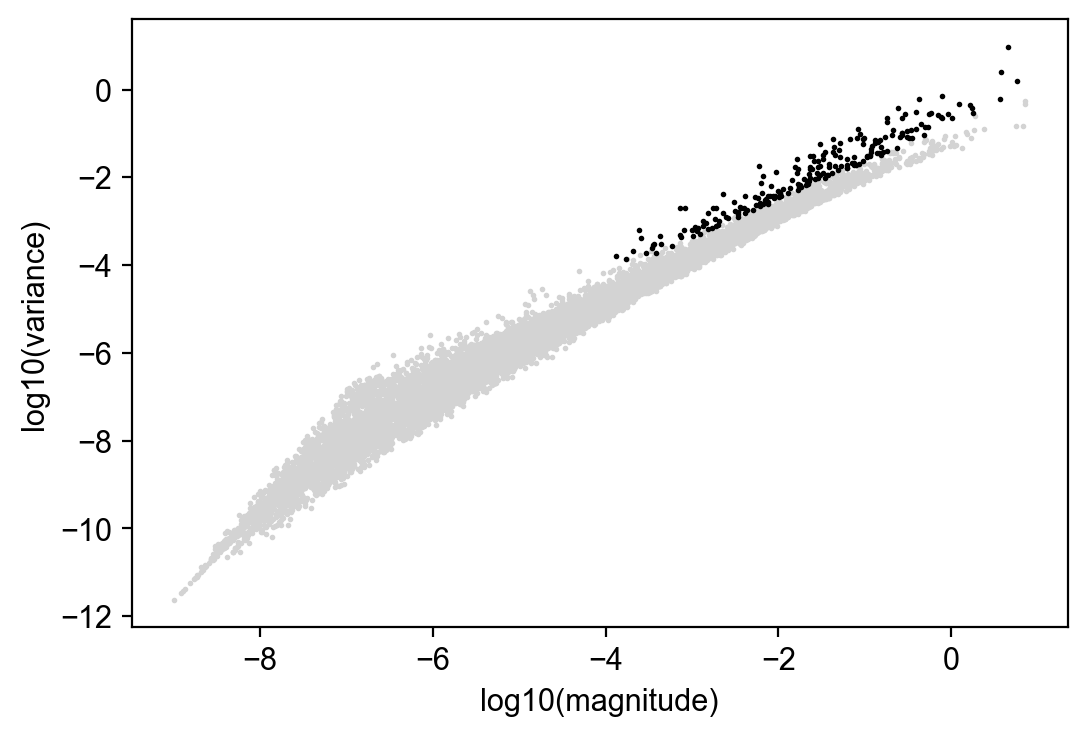

In [25]:
scf.pp.find_overdispersed(adata,plot=True)

In [26]:
adata.raw=adata

In [27]:
adata[:,adata.var.highly_variable]
sc.pp.scale(adata)
sc.pp.pca(adata)

In [28]:
sc.pp.neighbors(adata)

In [29]:
sc.tl.umap(adata)

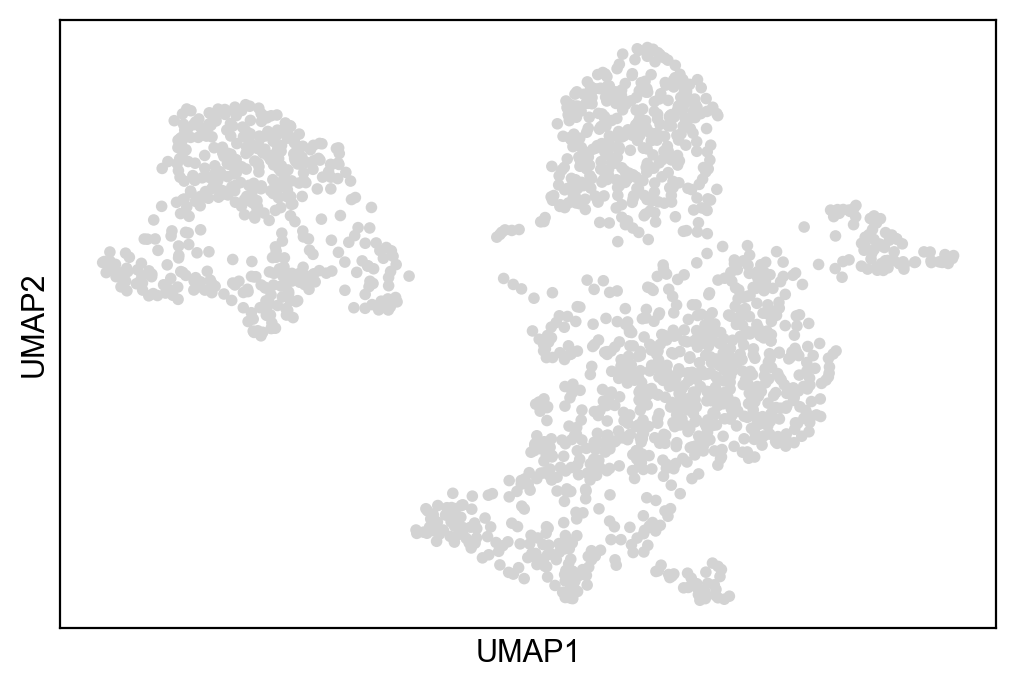

In [30]:
sc.pl.umap(adata)

In [31]:
sc.tl.leiden(adata)

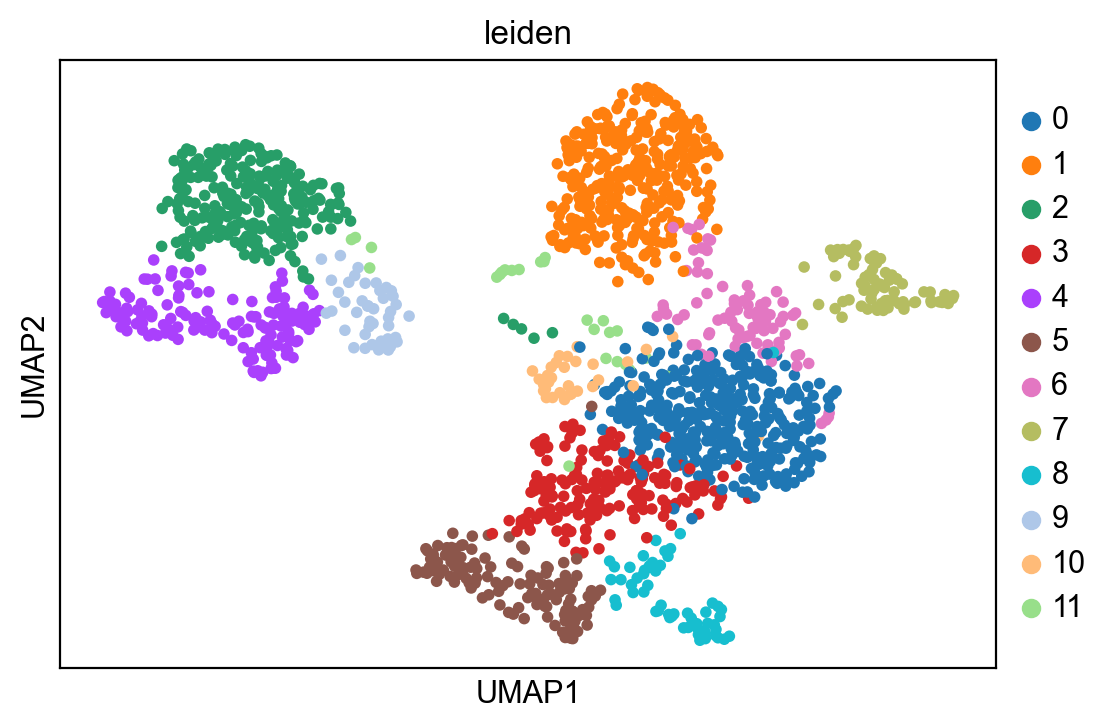

In [32]:
sc.pl.umap(adata,color="leiden")

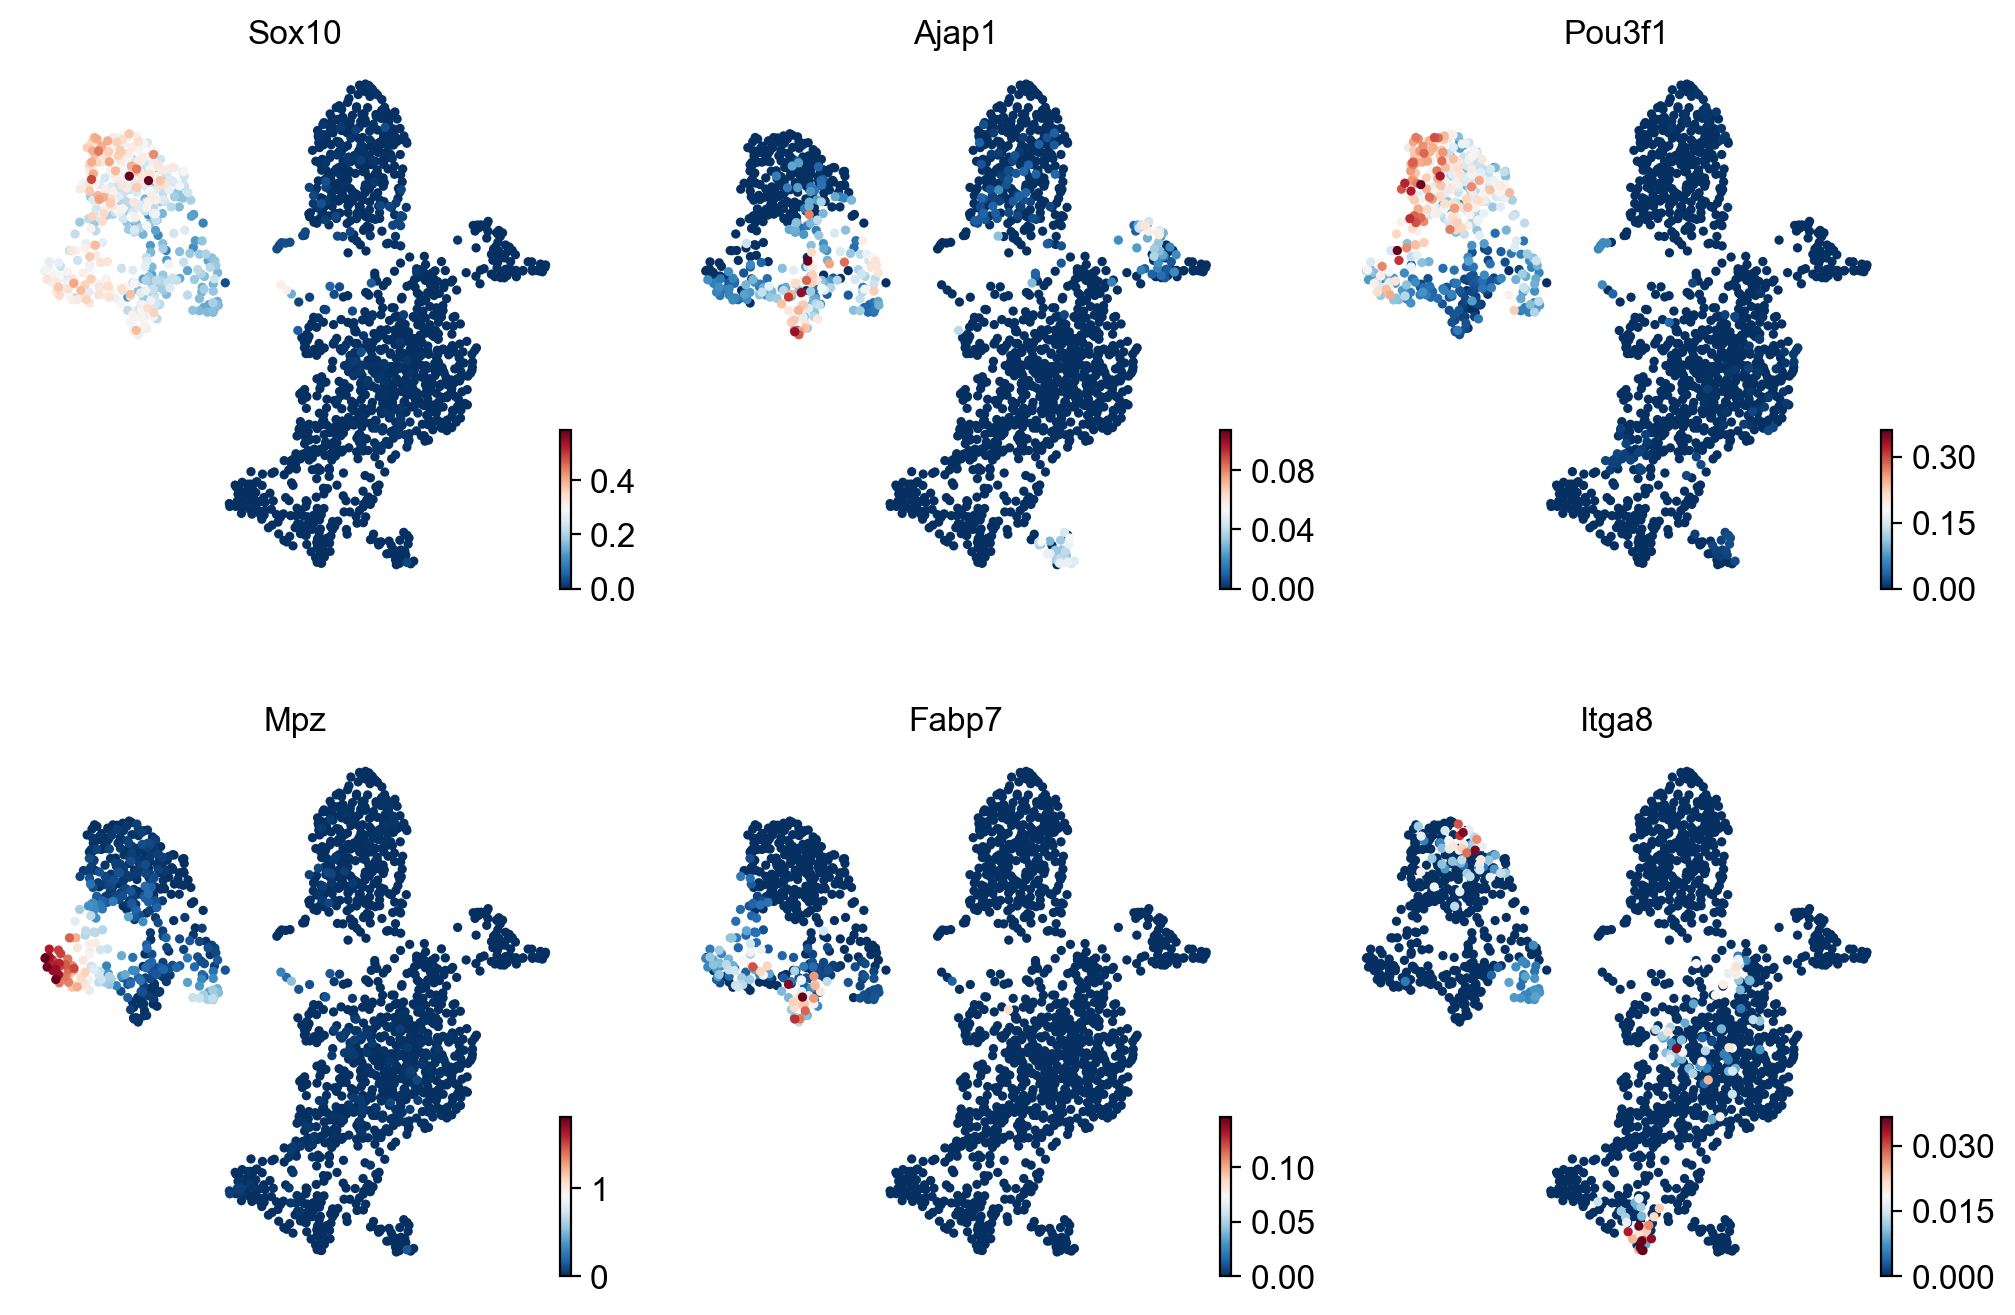

In [47]:
scv.set_figure_params(figsize=(4,4))
scv.pl.umap(adata,color=["Sox10","Ajap1","Pou3f1","Mpz","Fabp7","Itga8"],ncols=3,smooth=True)

In [48]:
adata.write("adata_processed.h5ad")